# Curso: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

# Práctica dirigida: Representación y Selección 


In [560]:
from __future__ import annotations
import math
import numpy as np
from enum import Enum
from bin_repr import dec2bin, bin2gray, my_map, inverse_map, bin2dec, gray2bin
import copy
import random 
import matplotlib.pyplot as plt
from typing import Callable,  NamedTuple
from itertools import combinations
from abc import ABC, abstractmethod

class Representation(Enum):
    BIN = 0
    GRAY = 1
    DECIMAL = 2

# Problemas de optimización
Este laboratorio se mostrará varios métodos de selección como la selección proporcional, ranking lineal, torneo, uniforme y selección ruleta, luego se medirá la intensidad de selección en un problema de minimización.


## 1. Dado los siguientes problemas de minimización de una función $\min_\mathbf{x}f(\mathbf{x})$


In [561]:
f1 = lambda x: x[0]**4 + 5*x[0]**3 + 4*x[0]**2 - 4*x[0] + 1
f2 = lambda x: 0.2 + x[0]**2 + x[1]**2 - 0.1*math.cos(6*math.pi*x[0]) - 0.1*math.sin(6*math.pi*x[1])
f3 = lambda x: math.pow(1/6.931 - x[0]*x[1]/(x[2]*x[3]), 2)


Dominio

In [562]:
domain_1, n_var_1 = [-4.0, 1], 1
domain_2, n_var_2 = [-1, 1.0], 2
domain_3, n_var_3 = [12, 60.], 4


Parámetros del individuo tipados

In [563]:
class IndividualArguments(NamedTuple):
    domain: tuple[int, int]
    eps: float
    n_var: int
    gen_size: int
    default_repr: Representation = Representation.DECIMAL


Clase individuo 

In [564]:
class Individual():
    def __init__(self, phenotype: list[float], args: IndividualArguments):
        self.domain = args.domain
        self.eps = args.eps
        self.n_var = args.n_var
        self.gen_size = args.gen_size
        self.default_repr = args.default_repr
        self.phenotype = phenotype

    def getGenotype(self, my_repr: Representation = None):
        my_repr = self.default_repr if my_repr == None else my_repr
        list_repr: list[int] = []
        if my_repr == Representation.BIN:
            for gen in self.phenotype:
                list_repr.extend(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps),
                                         bits=self.gen_size))
        elif my_repr == Representation.GRAY:
            for gen in self.phenotype:
                list_repr.extend(bin2gray(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps),
                                                  bits=self.gen_size)))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, args: IndividualArguments):
        phenotype: list[int] = []
        if args.default_repr == Representation.BIN:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gen), args.domain[0], args.eps))
        elif args.default_repr == Representation.GRAY:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gray2bin(gen)), args.domain[0], args.eps))
        else:
            phenotype = copy.deepcopy(genotype)

        return cls(phenotype, args)

    @staticmethod
    def newLike(genotype: list[int], parent: Individual):
        args = IndividualArguments(parent.domain, parent.eps, parent.n_var, parent.gen_size, parent.default_repr)
        return Individual.new(genotype, args)

    @classmethod
    def newRandom(cls, args: IndividualArguments):
        phenotype = [round(random.uniform(args.domain[0], args.domain[1]), 6) for _ in range(args.n_var)]
        return cls(phenotype, args)


### a) Representación del problema (1)
Implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dígitos (10 bits) y muestre/imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [565]:
POPULATION_SIZE = 10
GEN_SIZE_1 = 10
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
N_POINTS_1 = 2**GEN_SIZE_1

args1 = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1)

population_1 = [Individual.newRandom(args1) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")


Representación binaria
Genotipo 0 = [0, 0, 0, 0, 0, 1, 0, 0, 1, 0] Fenotipo 0 = [-3.914121]
Genotipo 1 = [1, 1, 0, 0, 0, 1, 1, 0, 0, 0] Fenotipo 1 = [-0.131386]
Genotipo 2 = [0, 1, 0, 0, 1, 1, 1, 0, 0, 0] Fenotipo 2 = [-2.475812]
Genotipo 3 = [1, 1, 0, 1, 1, 0, 0, 1, 0, 1] Fenotipo 3 = [0.248193]
Genotipo 4 = [0, 0, 1, 1, 0, 1, 1, 1, 1, 0] Fenotipo 4 = [-2.913855]
Genotipo 5 = [0, 1, 0, 1, 0, 1, 0, 0, 1, 1] Fenotipo 5 = [-2.344748]
Genotipo 6 = [0, 1, 0, 0, 0, 1, 0, 1, 1, 1] Fenotipo 6 = [-2.634392]
Genotipo 7 = [1, 1, 1, 1, 0, 1, 0, 0, 1, 1] Fenotipo 7 = [0.78342]
Genotipo 8 = [0, 1, 1, 0, 1, 1, 0, 1, 1, 0] Fenotipo 8 = [-1.858918]
Genotipo 9 = [1, 0, 1, 1, 1, 1, 0, 1, 1, 1] Fenotipo 9 = [-0.289356]


Realizar lo mismo del ítem anterior para la representación en código de Gray.

In [566]:
print("Representación en código Gray")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [0, 0, 0, 0, 0, 1, 1, 0, 1, 1] Fenotipo 0 = [-3.914121]
Genotipo 1 = [1, 0, 1, 0, 0, 1, 0, 1, 0, 0] Fenotipo 1 = [-0.131386]
Genotipo 2 = [0, 1, 1, 0, 1, 0, 0, 1, 0, 0] Fenotipo 2 = [-2.475812]
Genotipo 3 = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1] Fenotipo 3 = [0.248193]
Genotipo 4 = [0, 0, 1, 0, 1, 1, 0, 0, 0, 1] Fenotipo 4 = [-2.913855]
Genotipo 5 = [0, 1, 1, 1, 1, 1, 1, 0, 1, 0] Fenotipo 5 = [-2.344748]
Genotipo 6 = [0, 1, 1, 0, 0, 1, 1, 1, 0, 0] Fenotipo 6 = [-2.634392]
Genotipo 7 = [1, 0, 0, 0, 1, 1, 1, 0, 1, 0] Fenotipo 7 = [0.78342]
Genotipo 8 = [0, 1, 0, 1, 1, 0, 1, 1, 0, 1] Fenotipo 8 = [-1.858918]
Genotipo 9 = [1, 1, 1, 0, 0, 0, 1, 1, 0, 0] Fenotipo 9 = [-0.289356]


Considerando las representaciones anteriores (cadena de 10 bits) ¿cual sería el tamaño del espacio intrínseco?


In [567]:
print(f"El espacio intrinseco tendría {N_POINTS_1} elementos con una precisión de {eps_1}")

El espacio intrinseco tendría 1024 elementos con una precisión de 0.004887585532746823


### b) Representación del problema (2):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x, y$ estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su
representación binaria.

In [568]:
POPULATION_SIZE = 10
GEN_SIZE_2 = 5
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
N_POINTS_2 = 2**GEN_SIZE_2

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2)

population_2 = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 0, 0, 0, 0, 1, 1, 1, 0, 1] Fenotipo 0 = [0.006921, 0.900884]
Genotipo 1 = [1, 1, 1, 0, 1, 0, 1, 0, 1, 0] Fenotipo 1 = [0.841191, -0.349836]
Genotipo 2 = [1, 1, 1, 0, 1, 1, 0, 1, 0, 1] Fenotipo 2 = [0.899701, 0.367053]
Genotipo 3 = [1, 0, 1, 0, 1, 1, 1, 0, 0, 0] Fenotipo 3 = [0.364547, 0.560538]
Genotipo 4 = [0, 1, 1, 1, 0, 0, 0, 1, 0, 0] Fenotipo 4 = [-0.078577, -0.756779]
Genotipo 5 = [0, 1, 0, 1, 1, 1, 0, 1, 0, 0] Fenotipo 5 = [-0.292888, 0.285503]
Genotipo 6 = [0, 0, 0, 1, 0, 1, 0, 1, 1, 0] Fenotipo 6 = [-0.843499, 0.401395]
Genotipo 7 = [1, 1, 0, 0, 1, 0, 1, 0, 1, 1] Fenotipo 7 = [0.61417, -0.309994]
Genotipo 8 = [0, 0, 0, 0, 0, 1, 1, 0, 1, 0] Fenotipo 8 = [-0.9712, 0.686897]
Genotipo 9 = [0, 0, 0, 1, 0, 0, 1, 1, 0, 0] Fenotipo 9 = [-0.884818, -0.222678]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [569]:
print("Representación en código Gray")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [1, 1, 0, 0, 0, 1, 0, 0, 1, 1] Fenotipo 0 = [0.006921, 0.900884]
Genotipo 1 = [1, 0, 0, 1, 1, 0, 1, 1, 1, 1] Fenotipo 1 = [0.841191, -0.349836]
Genotipo 2 = [1, 0, 0, 1, 1, 1, 1, 1, 1, 1] Fenotipo 2 = [0.899701, 0.367053]
Genotipo 3 = [1, 1, 1, 1, 1, 1, 0, 1, 0, 0] Fenotipo 3 = [0.364547, 0.560538]
Genotipo 4 = [0, 1, 0, 0, 1, 0, 0, 1, 1, 0] Fenotipo 4 = [-0.078577, -0.756779]
Genotipo 5 = [0, 1, 1, 1, 0, 1, 1, 1, 1, 0] Fenotipo 5 = [-0.292888, 0.285503]
Genotipo 6 = [0, 0, 0, 1, 1, 1, 1, 1, 0, 1] Fenotipo 6 = [-0.843499, 0.401395]
Genotipo 7 = [1, 0, 1, 0, 1, 0, 1, 1, 1, 0] Fenotipo 7 = [0.61417, -0.309994]
Genotipo 8 = [0, 0, 0, 0, 0, 1, 0, 1, 1, 1] Fenotipo 8 = [-0.9712, 0.686897]
Genotipo 9 = [0, 0, 0, 1, 1, 0, 1, 0, 1, 0] Fenotipo 9 = [-0.884818, -0.222678]


Realizar lo mismo del ítem anterior para la representación real

In [570]:
print("Representación real")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.phenotype}")

Representación real
Individuo 0 = [0.006921, 0.900884]
Individuo 1 = [0.841191, -0.349836]
Individuo 2 = [0.899701, 0.367053]
Individuo 3 = [0.364547, 0.560538]
Individuo 4 = [-0.078577, -0.756779]
Individuo 5 = [-0.292888, 0.285503]
Individuo 6 = [-0.843499, 0.401395]
Individuo 7 = [0.61417, -0.309994]
Individuo 8 = [-0.9712, 0.686897]
Individuo 9 = [-0.884818, -0.222678]


Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual sería el tamaño del espacio intrínseco?


In [571]:
print(f"El espacio intrinseco tendría {N_POINTS_2} x {N_POINTS_2} = {2**(2*GEN_SIZE_2)} elementos con una precisión de {eps_2}")

El espacio intrinseco tendría 32 x 32 = 1024 elementos con una precisión de 0.06451612903225806


### c) Representación del problema (3):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x_1, x_2, x_3, x_4$ estén representados por 6 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.


In [572]:
POPULATION_SIZE = 10
GEN_SIZE_3 = 6
eps_3 = (60 - 12) / (2**GEN_SIZE_3 - 1)
N_POINTS_3 = 2**GEN_SIZE_3

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3)

population_3 = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0] Fenotipo 0 = [48.235886, 15.001365, 48.257308, 59.145676]
Genotipo 1 = [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0] Fenotipo 1 = [44.630056, 49.182551, 13.237768, 43.704849]
Genotipo 2 = [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0] Fenotipo 2 = [43.431189, 38.873368, 27.285933, 37.845266]
Genotipo 3 = [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1] Fenotipo 3 = [34.699079, 32.429633, 56.778843, 41.38937]
Genotipo 4 = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0] Fenotipo 4 = [54.473489, 42.659395, 15.69235, 24.052769]
Genotipo 5 = [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1] Fenotipo 5 = [54.233864, 46.800456, 33.012641, 29.150955]
Genotipo 6 = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1] Fenotipo 6 = [45.345028, 13.3

Realizar lo mismo del ítem anterior para la representación en código de Gray

In [573]:
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Genotipo 0 = [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1] Fenotipo 0 = [48.235886, 15.001365, 48.257308, 59.145676]
Genotipo 1 = [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] Fenotipo 1 = [44.630056, 49.182551, 13.237768, 43.704849]
Genotipo 2 = [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1] Fenotipo 2 = [43.431189, 38.873368, 27.285933, 37.845266]
Genotipo 3 = [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0] Fenotipo 3 = [34.699079, 32.429633, 56.778843, 41.38937]
Genotipo 4 = [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0] Fenotipo 4 = [54.473489, 42.659395, 15.69235, 24.052769]
Genotipo 5 = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0] Fenotipo 5 = [54.233864, 46.800456, 33.012641, 29.150955]
Genotipo 6 = [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1] Fenotipo 6 = [45.345028, 13.303076, 31.999298, 39.86

Realizar lo mismo del ítem anterior para la representación real.

In [574]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [48.235886, 15.001365, 48.257308, 59.145676]
Individuo 1 = [44.630056, 49.182551, 13.237768, 43.704849]
Individuo 2 = [43.431189, 38.873368, 27.285933, 37.845266]
Individuo 3 = [34.699079, 32.429633, 56.778843, 41.38937]
Individuo 4 = [54.473489, 42.659395, 15.69235, 24.052769]
Individuo 5 = [54.233864, 46.800456, 33.012641, 29.150955]
Individuo 6 = [45.345028, 13.303076, 31.999298, 39.860591]
Individuo 7 = [57.395328, 19.649783, 39.875548, 49.602804]
Individuo 8 = [43.860011, 28.326346, 38.248186, 42.510411]
Individuo 9 = [46.551941, 54.673829, 45.068754, 49.435203]


Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrínseco

In [575]:
print(f"El espacio intrinseco tendría {N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}={2**(4*GEN_SIZE_3)} elementos con una precisión de {eps_3}")

El espacio intrinseco tendría 64x64x64x64=16777216 elementos con una precisión de 0.7619047619047619


## 2. Gestión de la población: de la teoría se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:

## Selection

In [576]:
class Selection(ABC):
    def __init__(self, num_individuals: int):
        self.num_individuals = num_individuals

    @abstractmethod
    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pass

    @staticmethod
    def intensity(prev_fitness: list[float], curr_fitness: list[float]):
        prev_fitness = np.array(prev_fitness)
        curr_fitness = np.array(curr_fitness)
        mean_prev = np.mean(prev_fitness)   # f
        mean_curr = np.mean(curr_fitness)   # g
        std_prev = np.std(prev_fitness)     # f 
        return (mean_curr - mean_prev) / std_prev if std_prev != 0.0 else 0.0


De una población de 10 individuos se seleccionarán 5 individuos del problema 2

In [577]:
POPULATION_SIZE = 10
SELECTED_SIZE = 5
args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
fitness_population = [f2(ind.phenotype) for ind in initial_population]
for i, ind in enumerate(initial_population):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [0.385852, 0.146741]
Individuo 1 = [-0.84245, 0.382142]
Individuo 2 = [-0.369355, -0.898481]
Individuo 3 = [-0.374426, 0.817075]
Individuo 4 = [0.702347, 0.369933]
Individuo 5 = [-0.423479, -0.131547]
Individuo 6 = [-0.610845, -0.70721]
Individuo 7 = [-0.535791, 0.941648]
Individuo 8 = [0.115228, 0.762114]
Individuo 9 = [0.261679, -0.128341]


### Método de selección proporcional

In [578]:
class ProportionalSelection(Selection):
    def __init__(self, num_individuals: int, delta: float = 0.0):
        super().__init__(num_individuals)
        # fi + 10, fi + 100
        self.delta = delta

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        f_max = max(fitness)
        # individuos con menor fitness (f_max - f) tienen mayor probabilidad de ser seleccionados  
        # presión de selección
        fitness = f_max - np.array(fitness) + 1e-4 + self.delta
        distribution = fitness / fitness.sum()
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [579]:
selected = ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.385852, 0.146741]
Individuo 1 = [-0.374426, 0.817075]
Individuo 2 = [-0.374426, 0.817075]
Individuo 3 = [-0.84245, 0.382142]
Individuo 4 = [0.261679, -0.128341]


### Método de selección basada en ranking lineal

In [580]:
class LinearRankingSelection(Selection):
    def __init__(self, num_individuals: int, s: float):
        super().__init__(num_individuals)
        self.s = s

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        mu = len(population)
        pop_fit = zip(population, fitness)
        sorted_pop_fit = sorted(pop_fit, key=lambda val: val[1], reverse=True)
        pop_fit = list(zip(*sorted_pop_fit))
        distribution = [(2 - self.s) / mu + 2 * i * (self.s - 1) / (mu * (mu - 1)) for i in range(mu)]

        return random.choices(pop_fit[0], weights=distribution, k=self.num_individuals)


In [581]:
selected = LinearRankingSelection(num_individuals=SELECTED_SIZE, s=1.5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.261679, -0.128341]
Individuo 1 = [-0.423479, -0.131547]
Individuo 2 = [0.261679, -0.128341]
Individuo 3 = [0.115228, 0.762114]
Individuo 4 = [-0.423479, -0.131547]


### Método de torneo

In [582]:
class TournamentSelection(Selection):
    def __init__(self, num_individuals: int, tournament_size: int):
        super().__init__(num_individuals)
        self.tournament_size = tournament_size

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pop_fit_zipped = list(zip(population, fitness))
        selected: list[Individual] = []
        for _ in range(self.num_individuals):
            candidates = random.choices(pop_fit_zipped, k=self.tournament_size)
            selected.append(min(candidates, key=lambda pop_fit: pop_fit[1])[0])
        return selected


In [583]:
selected = TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.423479, -0.131547]
Individuo 1 = [0.261679, -0.128341]
Individuo 2 = [-0.423479, -0.131547]
Individuo 3 = [0.702347, 0.369933]
Individuo 4 = [0.702347, 0.369933]


### Método de selección uniforme

In [584]:
class UniformSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float] = None):
        # por defecto el metodo choice implementa una distribucion uniforme
        return random.choices(population, k=self.num_individuals) 


In [585]:
selected = UniformSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.115228, 0.762114]
Individuo 1 = [-0.84245, 0.382142]
Individuo 2 = [-0.374426, 0.817075]
Individuo 3 = [-0.535791, 0.941648]
Individuo 4 = [-0.369355, -0.898481]


### Método de de la ruleta

In [586]:
class RouletteSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        # individuos con menor fitness tienen mayor probabilidad de ser seleccionados
        # presion de seleccion
        f_max = max(fitness)
        fitness = f_max - np.array(fitness) + 1e-4
        distribution = np.array(fitness) / sum(fitness)
        # el metodo de la ruleta es similar a seleccionar elementos de una lista dada una distribucion de probabilidades
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [587]:
selected = RouletteSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.702347, 0.369933]
Individuo 1 = [-0.423479, -0.131547]
Individuo 2 = [-0.423479, -0.131547]
Individuo 3 = [-0.423479, -0.131547]
Individuo 4 = [-0.423479, -0.131547]


## Crossover

In [588]:
class Crossover(ABC):
    def __init__(self, probability: float):
        self.probability = probability
    
    @abstractmethod
    def make(self, p1: Individual, p2: Individual):
        pass
        

### One-Point Crossover

In [589]:
class OnePointCrossover(Crossover):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())
            point = random.randint(1, len(c1) - 2)

            c1[point:], c2[point:] = c2[point:], c1[point:]
            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None

### N-Point Crossover

In [590]:
class NPointCrossover(Crossover):
    def __init__(self, probability: float, n: int):
        super().__init__(probability)
        self.n = n

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            ps = random.sample(range(1, p1.gen_size * p1.n_var - 1), self.n)
            ps.append(0)
            ps.append(p1.gen_size * p1.n_var)
            ps = sorted(ps)
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())
            for i in range(0, self.n + 1):
                if i % 2 == 0:
                    continue
                c1[ps[i]:ps[i + 1]], c2[ps[i]:ps[i + 1]] = c2[ps[i]:ps[i + 1]], c1[ps[i]:ps[i + 1]]

            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None


### Shuffle Crossover

In [591]:
class ShuffleCrossover(Crossover):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            index = list(range(0, p1.gen_size * p1.n_var))
            random.shuffle(index)

            p1_gen = np.array(p1.getGenotype())
            p2_gen = np.array(p2.getGenotype())

            c1 = np.copy(p1_gen[index])
            c2 = np.copy(p1_gen[index])
            temp = np.copy(p2_gen[index])

            point = random.randint(1, len(c1) - 2)
            # slice swap list isn't equals that slice in numpy
            c1[point:], c2[:point] = temp[point:], temp[:point]

            c1_unshuffle = np.zeros_like(c1, dtype=int)
            c2_unshuffle = np.zeros_like(c2, dtype=int)

            c1_unshuffle[index] = c1[index]
            c2_unshuffle[index] = c2[index]
            return Individual.newLike(c1_unshuffle, p1), Individual.newLike(c2_unshuffle, p2)
        return None


### Uniform Crossover

In [592]:
class UniformCrossover(Crossover):
    def __init__(self, probability: float, swap_probability: float):
        super().__init__(probability)
        self.swap_probability = swap_probability

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            # swap a random position i
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())

            for i in range(p1.gen_size * p1.n_var):
                if random.random() < self.swap_probability:
                    c1[i], c2[i] = c2[i], c1[i]
            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None


## Mutation

In [593]:
class Mutation:
    def __init__(self, probability: float):
        self.probability = probability

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadea
            point = random.randint(0, len(mut) - 1)

            if len(mut) > ind.n_var:
                mut[point] = (mut[point] + 1) % 2
            else:
                mut[point] = random.uniform(ind.domain[0], ind.domain[1])
            return Individual.newLike(mut, ind)
        return None

### Esquema general de un AE genérico 

In [594]:
def genenetic_algorithm(max_generation: int,
                        fitness: Callable[[list[float]], float],
                        population: list[Individual],
                        selection: Selection,
                        crossover: Crossover,
                        mutation: Mutation):
    best: list[Individual] = []
    generation_number = 0
    while generation_number < max_generation:
        generation_number += 1
        # evaluacion de la aptitud de la población inicial (n individuos)
        population_fitness = [fitness(ind.phenotype) for ind in population]
        # seleccion de los padres (para la reproducción)
        parents = selection.get_individuals(population, population_fitness)
        # operadores de variación
        offspring: list[Individual] = []
        # crossover
        for p1, p2 in zip(parents[0::2], parents[1::2]):
            if (childs := crossover.make(p1, p2)) != None:
                offspring += childs
        # mutation
        for ind in parents:
            if (mutant := mutation.make(ind)) != None:
                offspring.append(mutant)
        # evaluacion de la aptitud de los λ descendientes
        offspring_fitness = [fitness(ind.phenotype) for ind in offspring]

        prev_fitness = copy.deepcopy(population_fitness) 
        # λ individuos aptos + n padres
        population += offspring
        population_fitness += offspring_fitness
        # seleccionamos un individuo para la grafica
        best.append(population[random.randint(0, len(population) - 1)])
        # selección del ambiente n
        population = selection.get_individuals(population, population_fitness)
        
        curr_fitness = [fitness(ind.phenotype) for ind in population]
        S = selection.intensity(prev_fitness, curr_fitness)      
        
        # impresión de la generación
        if generation_number % int(max_generation / 10) == 0:
            print(f"Generación: {generation_number}, número de descendientes: {len(offspring)}, intensidad: {S}")

    plt.plot([fitness(x.phenotype) for x in best], "r-")
    plt.title(f"Generation number {generation_number} with {selection.__class__.__name__}")
    plt.ylabel("Fitness")
    plt.xlabel("Generation")
    plt.show()
    return best


## 3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.
**Importante**: El número de descendientes está dado de manera probabiliística por los operadores de variación, por lo que es complicado establecer un número fijo de descendientes, sin embargo, tendrá el casi el mismo número según la cantidad de padres que se apareen, pues si son 10 padres, cada 2 parejas pueden tener 2 hijos, habrá alrededor de 8, 9 o 10 descendientes.


#### a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 15 individuos)


Generación: 1, número de descendientes: 6, intensidad: -0.5663579479546602
Generación: 2, número de descendientes: 10, intensidad: -0.8616987931215491
Generación: 3, número de descendientes: 9, intensidad: -0.5026966711592507
Generación: 4, número de descendientes: 11, intensidad: -0.6427701752787921
Generación: 5, número de descendientes: 8, intensidad: -0.6546536707079772
Generación: 6, número de descendientes: 8, intensidad: 0.0
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 7, intensidad: 0.0
Generación: 10, número de descendientes: 6, intensidad: 0.0


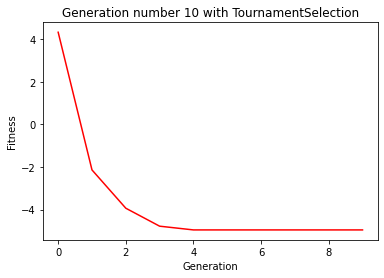

In [638]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 15
SELECTED_SIZE = 10
# NOTA: El número de descendientes está dado de manera estocástica según los operadores de variación, así que es complicado establecer un número fijo de descendientes
# sin embargo rondará los 10 individuos.
OFFSPRING_SIZE = 10
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]

# PIPELINE GA TOURNAMENT SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=3),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).

In [639]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Tournament Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Tournament Selection
 x* = [-3.032258064516129], f(x*) = -4.953978306936161


Generación: 1, número de descendientes: 8, intensidad: -0.15701192211201484
Generación: 2, número de descendientes: 8, intensidad: -0.4404896361422289
Generación: 3, número de descendientes: 10, intensidad: -0.6360181370136749
Generación: 4, número de descendientes: 8, intensidad: -0.29127167540599946
Generación: 5, número de descendientes: 10, intensidad: -0.7071506747912225
Generación: 6, número de descendientes: 8, intensidad: 0.2499999999999981
Generación: 7, número de descendientes: 8, intensidad: -0.21821789023599072
Generación: 8, número de descendientes: 4, intensidad: -0.24999999999998868
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: -0.3333333333333434


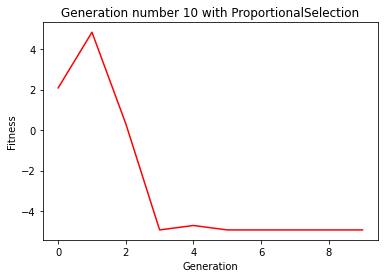

In [641]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=UniformCrossover(probability=CROSSOVER_PROBABILITY, swap_probability=0.5),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [642]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-2.870967741935484], f(x*) = -4.927351949766155


Generación: 1, número de descendientes: 8, intensidad: -0.5395850489233303
Generación: 2, número de descendientes: 8, intensidad: -0.4827628851856865
Generación: 3, número de descendientes: 10, intensidad: -0.3333333333333333
Generación: 4, número de descendientes: 8, intensidad: 0.0
Generación: 5, número de descendientes: 10, intensidad: 0.0
Generación: 6, número de descendientes: 6, intensidad: 0.0
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 6, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


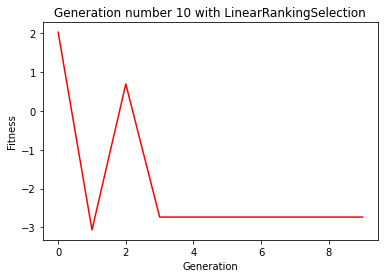

In [599]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [600]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [-2.500177], f(x*) = -3.0637831246562754


Generación: 1, número de descendientes: 10, intensidad: -0.12917332825194944
Generación: 2, número de descendientes: 8, intensidad: 0.17110679607885393
Generación: 3, número de descendientes: 10, intensidad: -0.48444624380764423
Generación: 4, número de descendientes: 8, intensidad: -0.6187744226527045
Generación: 5, número de descendientes: 6, intensidad: -0.23716870704341267
Generación: 6, número de descendientes: 10, intensidad: 0.2856217100055644
Generación: 7, número de descendientes: 8, intensidad: 0.0021998471564474687
Generación: 8, número de descendientes: 8, intensidad: 0.3087664739294465
Generación: 9, número de descendientes: 11, intensidad: -0.22800334589644292
Generación: 10, número de descendientes: 8, intensidad: -0.3326773183046768


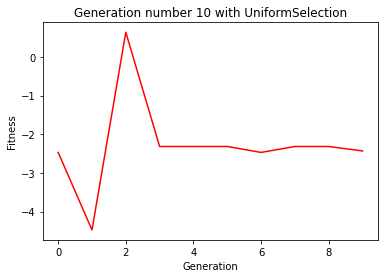

In [601]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [602]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Uniform Selection
 x* = [-2.734115347018573], f(x*) = -4.47343284158822


Generación: 1, número de descendientes: 10, intensidad: -0.14599092242224576
Generación: 2, número de descendientes: 10, intensidad: -1.1494835834284813
Generación: 3, número de descendientes: 8, intensidad: -0.8923504989362767
Generación: 4, número de descendientes: 10, intensidad: -1.5263116659908722
Generación: 5, número de descendientes: 10, intensidad: 0.0
Generación: 6, número de descendientes: 6, intensidad: 0.0
Generación: 7, número de descendientes: 4, intensidad: 0.0
Generación: 8, número de descendientes: 6, intensidad: 0.0
Generación: 9, número de descendientes: 4, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


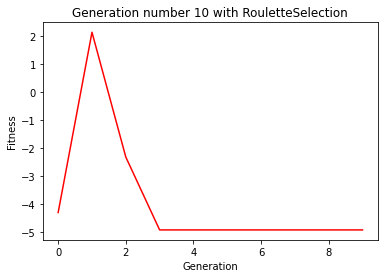

In [603]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [604]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Roulette Selection
 x* = [-3.0469208211143695], f(x*) = -4.923730912946397


#### b) Para el segundo caso (ecuación 2) considerar la representación Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 10, intensidad: -1.079381238071998
Generación: 2, número de descendientes: 10, intensidad: -1.5060943909841256
Generación: 3, número de descendientes: 14, intensidad: -1.8363809028504623
Generación: 4, número de descendientes: 12, intensidad: -0.6030226891555283
Generación: 5, número de descendientes: 12, intensidad: 0.0
Generación: 6, número de descendientes: 10, intensidad: 0.0
Generación: 7, número de descendientes: 10, intensidad: 0.0
Generación: 8, número de descendientes: 15, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


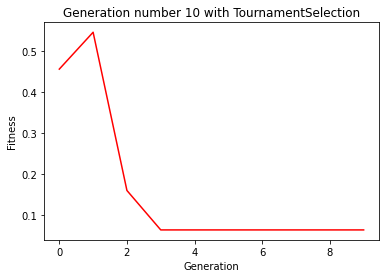

In [605]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))



In [606]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value
 x* = [0.032258064516129004, 0.032258064516129004], f(x*) = 0.06287799982244661


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 12, intensidad: -0.11285767448348359
Generación: 2, número de descendientes: 14, intensidad: -0.24380128276271273
Generación: 3, número de descendientes: 15, intensidad: 1.0694559401869899
Generación: 4, número de descendientes: 10, intensidad: 0.39535400155666345
Generación: 5, número de descendientes: 12, intensidad: -0.133159739471113
Generación: 6, número de descendientes: 10, intensidad: -0.37354242998191256
Generación: 7, número de descendientes: 12, intensidad: 0.5537938309679157
Generación: 8, número de descendientes: 10, intensidad: -0.08946345102205833
Generación: 9, número de descendientes: 6, intensidad: 0.14441328921026989
Generación: 10, número de descendientes: 10, intensidad: -0.24757673166064667


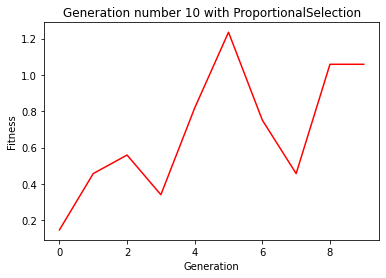

In [607]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [608]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-0.09677419354838712, 0.09677419354838701], f(x*) = 0.14698803041313296


Generación: 1, número de descendientes: 11, intensidad: -0.5337390529365587
Generación: 2, número de descendientes: 13, intensidad: -0.7138256783707017
Generación: 3, número de descendientes: 14, intensidad: -0.4676735767686079
Generación: 4, número de descendientes: 12, intensidad: -0.6418177917766158
Generación: 5, número de descendientes: 12, intensidad: -0.6259434471916975
Generación: 6, número de descendientes: 10, intensidad: -0.2945295796928845
Generación: 7, número de descendientes: 14, intensidad: -0.9125211690128076
Generación: 8, número de descendientes: 14, intensidad: -0.7071067811865474
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


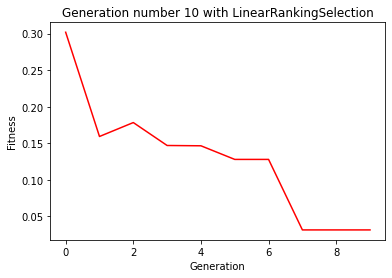

In [609]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [610]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [0.032258064516129004, 0.09677419354838701], f(x*) = 0.031521771255919276


Generación: 1, número de descendientes: 10, intensidad: -0.019328899811228675
Generación: 2, número de descendientes: 13, intensidad: -0.1753531358069373
Generación: 3, número de descendientes: 12, intensidad: -0.05367550455606672
Generación: 4, número de descendientes: 10, intensidad: -0.12533981153663873
Generación: 5, número de descendientes: 13, intensidad: -0.22818857712178336
Generación: 6, número de descendientes: 10, intensidad: -0.4451401596178269
Generación: 7, número de descendientes: 12, intensidad: -0.2930039146240388
Generación: 8, número de descendientes: 8, intensidad: 0.8259745339226489
Generación: 9, número de descendientes: 9, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


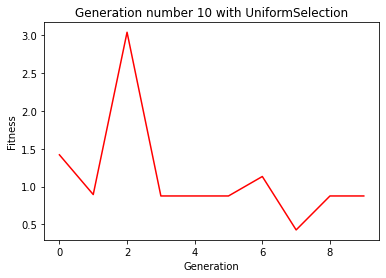

In [611]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [612]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [-0.09677419354838712, 0.032258064516129004], f(x*) = 0.17834425897966033


Generación: 1, número de descendientes: 11, intensidad: -0.17337558393914598
Generación: 2, número de descendientes: 10, intensidad: -0.8221304303517479
Generación: 3, número de descendientes: 8, intensidad: -0.6614598602167435
Generación: 4, número de descendientes: 12, intensidad: -0.19510547993642657
Generación: 5, número de descendientes: 10, intensidad: -0.4898377829160584
Generación: 6, número de descendientes: 14, intensidad: -0.26932107821103124
Generación: 7, número de descendientes: 12, intensidad: -0.5
Generación: 8, número de descendientes: 10, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 14, intensidad: 0.0


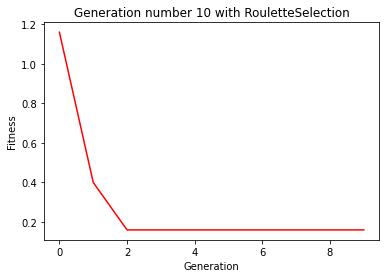

In [613]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [614]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [-0.29032258064516125, 0.032258064516129004], f(x*) = 0.15930427014174514


#### c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 10, intensidad: -0.49789909786316056
Generación: 2, número de descendientes: 12, intensidad: -0.6106679084965847
Generación: 3, número de descendientes: 12, intensidad: 0.0
Generación: 4, número de descendientes: 12, intensidad: 0.0
Generación: 5, número de descendientes: 12, intensidad: 0.0
Generación: 6, número de descendientes: 12, intensidad: 0.0
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


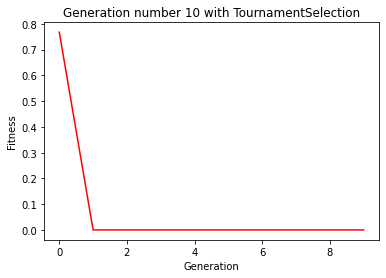

In [615]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [616]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value
 x* = [26.323206, 14.105726, 45.784185, 51.03204], f(x*) = 0.00021431993137149163


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 12, intensidad: 0.13174652332384904
Generación: 2, número de descendientes: 12, intensidad: -0.3490003302040988
Generación: 3, número de descendientes: 12, intensidad: -0.25919615166615023
Generación: 4, número de descendientes: 10, intensidad: -0.1736302123198461
Generación: 5, número de descendientes: 12, intensidad: 0.015432676963060986
Generación: 6, número de descendientes: 9, intensidad: 0.16419489831660683
Generación: 7, número de descendientes: 9, intensidad: 0.3024747314973809
Generación: 8, número de descendientes: 7, intensidad: -0.17476304342992569
Generación: 9, número de descendientes: 14, intensidad: 0.08125192685077953
Generación: 10, número de descendientes: 12, intensidad: 0.5299717524201449


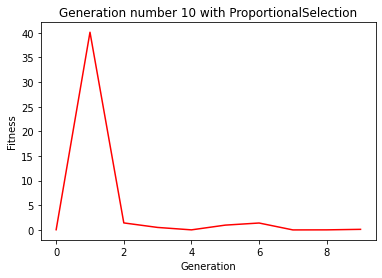

In [617]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [618]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [13.661692, 20.581172, 37.195785, 42.035815784733146], f(x*) = 0.001263828105011766


Generación: 1, número de descendientes: 12, intensidad: -0.34267701029356223
Generación: 2, número de descendientes: 12, intensidad: -0.5676527396080003
Generación: 3, número de descendientes: 12, intensidad: -0.3363867834697309
Generación: 4, número de descendientes: 10, intensidad: -0.5008970509344062
Generación: 5, número de descendientes: 10, intensidad: -0.6037696963620702
Generación: 6, número de descendientes: 14, intensidad: -0.5490590976896498
Generación: 7, número de descendientes: 14, intensidad: -0.2672612419124246
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 14, intensidad: 0.0


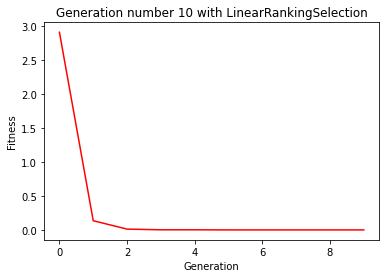

In [619]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [620]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [13.661692, 20.581172, 45.784185, 51.03204], f(x*) = 0.0005730094469319052


Generación: 1, número de descendientes: 15, intensidad: 0.05252347113182083
Generación: 2, número de descendientes: 10, intensidad: 0.35934107831714784
Generación: 3, número de descendientes: 12, intensidad: -0.2600630716025043
Generación: 4, número de descendientes: 14, intensidad: -0.10662768568735478
Generación: 5, número de descendientes: 14, intensidad: 0.2540603218884757
Generación: 6, número de descendientes: 10, intensidad: 0.5754730326489651
Generación: 7, número de descendientes: 12, intensidad: 0.4326496775070954
Generación: 8, número de descendientes: 12, intensidad: -0.6535263203253701
Generación: 9, número de descendientes: 10, intensidad: -0.19975875585190037
Generación: 10, número de descendientes: 8, intensidad: 0.38043669697775345


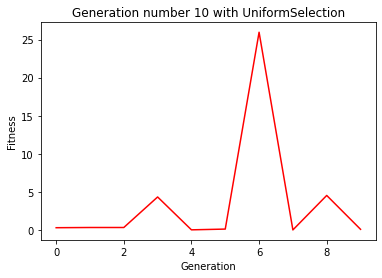

In [621]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [622]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [27.36517, 20.096531, 53.724217, 54.839198], f(x*) = 0.0017963692570603267


Generación: 1, número de descendientes: 10, intensidad: -0.1933295473259702
Generación: 2, número de descendientes: 14, intensidad: -0.51073797813808
Generación: 3, número de descendientes: 9, intensidad: -0.49417685303451514
Generación: 4, número de descendientes: 13, intensidad: -0.5316025217612781
Generación: 5, número de descendientes: 12, intensidad: -3.4743961448615175
Generación: 6, número de descendientes: 14, intensidad: -0.2672612419124244
Generación: 7, número de descendientes: 11, intensidad: 0.0
Generación: 8, número de descendientes: 9, intensidad: 0.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


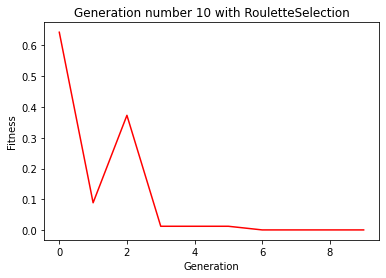

In [623]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=Mutation(probability=MUTATION_PROBABILITY))


In [624]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [13.661692, 20.581172, 56.033235790070364, 29.515766], f(x*) = 0.0006620749704024406
